In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib import animation
from scipy.integrate import simpson
from scipy import interpolate
from scipy import integrate
global gravity
from itertools import accumulate
import random
from bokeh.io import output_notebook
output_notebook()
gravity = 9.81

Loading BokehJS ...

In [2]:
#REPLACE WITH BETTER CURVE LATER
#read in original thrust curve
df = pd.read_csv("pid_sim/AeroTech_M1850W.csv")

thrust_og=df['AeroTech M1850W'][3:]
time_og=df['motor:'][3:]
thrust_og = thrust_og.to_numpy()
thrust_og = thrust_og.astype(float)
time_og = time_og.to_numpy()
time_og = time_og.astype(float)
time_og = time_og-0.006 #subtract offset

In [2]:
#CREATE FAKE THRUST CURVE FOR NOW
time_end = 30 #seconds
global step_size
step_size = 0.1 #seconds
time = np.arange(0 + step_size, time_end + step_size, step_size)
time

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [3]:
len(time)

300

In [4]:
max_thrust = 15 #N 
thrust=np.full(len(time), max_thrust, dtype=float)
thrust

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15

In [5]:
thrust.max(), time.max()

(15.0, 30.000000000000004)

Text(0, 0.5, 'Thrust (n)')

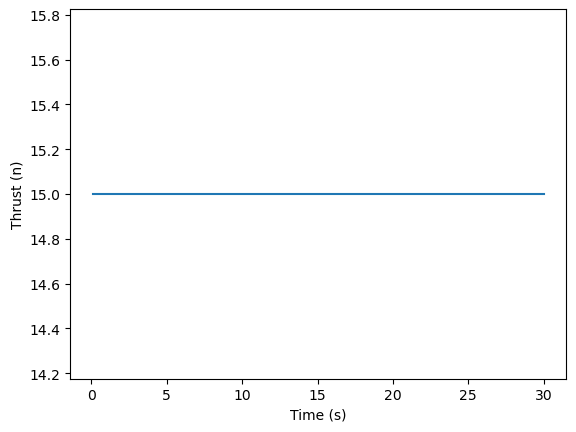

In [6]:
plt.plot(time, thrust)
plt.xlabel("Time (s)")
plt.ylabel("Thrust (n)")

In [7]:
#SKIP THESE NEXT 2 CELLS
thrust_og = [32.284, 37.105, 40.246, 19.502, 16.946, 14.535, 13.659, 13.001, 12.782, 12.344, 12.052, 11.76, 10.664, 10.956, 11.321, 12.198, 10.591, 0.0]
time_og = [0.045, 0.253, 0.343, 0.417, 0.625, 1.787, 3.946, 7.029, 11.839, 15.443, 16.366, 16.515, 16.575, 16.828, 17.23, 17.587, 17.736, 17.96]

In [503]:
#interpolate original thrust curve
global step_size
step_size = 0.05
f = interpolate.interp1d(time_og, thrust_og)
time = np.arange(0.045, 17.95, step_size)
thrust = f(time)

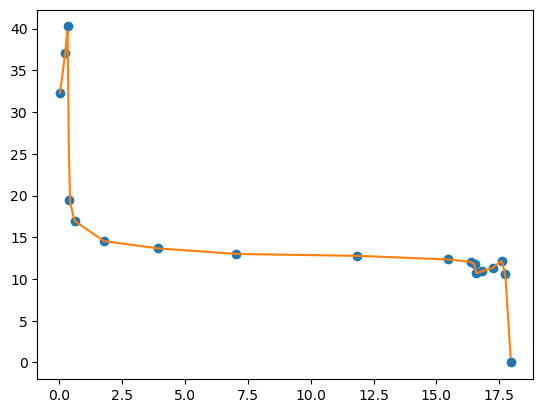

In [390]:
#check for funny business
plt.plot(time_og, thrust_og, 'o', time, thrust, '-')

In [8]:
global thrust
global time
thrust = thrust
time = time

In [9]:
class rocket():
    def __init__(self, tvc_angle, x, y, vert_angle, momentum_angle, mass, dist_thrust_com, dist_center_press_mass):
        #independent
        self.tvc_angle=tvc_angle #deg
        #depedent
        self.x = x #m
        self.y = y #m
        self.vert_angle=vert_angle #deg
        self.momentum_angle=momentum_angle #deg
        #constant
        self.mass=mass #kg
        self.dist_thrust_com = dist_thrust_com #meters
        self.dist_center_press_mass = dist_center_press_mass
        self.moi = float((1/3)*self.mass*(2*np.square(self.dist_thrust_com)))

In [849]:
def sum_forces(rocket, index, freefall=False):
    #drag (1/2*row*A*v^2*C_d) (C_d=0.1) A=sin(angle of vert - angle of momentum)
    #row is air density at sea level : 1.204
    #dist_center_press_mass * sin(angle of vert - angle of momentum)

    #calc drag based off last velocity
    F_drag = abs(0.5*1.204*(math.sin(math.radians(rocket.momentum_angle[-1] - rocket.vert_angle[0][-1])))*(np.sqrt(np.square(rocket.x[1][-1])+np.square(rocket.x[1][-1])))*0.1)
    F_drag_torque = 0.5*1.204*(math.sin(math.radians(rocket.momentum_angle[-1] - (90-rocket.vert_angle[0][-1]))))*(np.sqrt(np.square(rocket.x[1][-1])+np.square(rocket.x[1][-1])))* 0.1 * rocket.dist_center_press_mass
    F_drag_x = F_drag*math.cos(math.radians(rocket.momentum_angle[-1]))
    F_drag_y = F_drag*math.sin(math.radians(rocket.momentum_angle[-1]))
    #print("F_drag_torque:" + str(F_drag_torque)+ "Momentum -  (90 - vert angle): " + str(rocket.momentum_angle[-1] - (90-rocket.vert_angle[0][-1])))
    #check freefall  
    if freefall == True:
        if rocket.y[1][-1] < 0 :
            F_drag_y = -F_drag_y
        if rocket.x[1][-1] < 0:
            F_drag_x = -F_drag_x
        Ftx = -F_drag_x
        Fty = -(rocket.mass*gravity) - F_drag_y
        Mt = F_drag_torque
        rocket.vert_angle[2].append(Mt/rocket.moi)
        rocket.vert_angle[1].append((rocket.vert_angle[1][-1])+rocket.vert_angle[2][index+1]*step_size)
        rocket.vert_angle[0].append(((rocket.vert_angle[0][-1])+rocket.vert_angle[1][index+1]*step_size))
        # rocket.vert_angle[2].append(0)
        # rocket.vert_angle[1].append(rocket.vert_angle[1][-1])
        # rocket.vert_angle[0].append((rocket.vert_angle[0][-1])+(rocket.vert_angle[1][-1] * step_size)) #meters, moment of torque (NOT MOMENTUM) #how do we add drag?
        rocket.tvc_angle.append(rocket.tvc_angle[-1])
        rocket.x[2].append(Ftx)
        rocket.y[2].append(Fty)
    else:
        if rocket.y[1][-1] < 0 :
            F_drag_y = -F_drag_y
        if rocket.x[1][-1] < 0:
            F_drag_x = -F_drag_x
        Ftx=thrust[index]*math.cos(math.radians((90-rocket.vert_angle[0][-1])-rocket.tvc_angle[-1]))-F_drag_x
        Fty=thrust[index]*math.sin(math.radians((90-rocket.vert_angle[0][-1])-rocket.tvc_angle[-1]))-(rocket.mass*gravity)-F_drag_y
        #print(str(thrust[index]*math.sin(math.radians(rocket.tvc_angle[-1]))*rocket.dist_thrust_com) + " + " + str(F_drag_torque))
        Mt = (thrust[index]*math.sin(math.radians(rocket.tvc_angle[-1]))*rocket.dist_thrust_com)+F_drag_torque #meters, moment of torque (NOT MOMENTUM) #how do we add drag?
        rocket.vert_angle[2].append(Mt/rocket.moi)
        rocket.vert_angle[1].append((rocket.vert_angle[1][-1])+rocket.vert_angle[2][index+1]*step_size)
        rocket.vert_angle[0].append(((rocket.vert_angle[0][-1])+rocket.vert_angle[1][index+1]*step_size))
        rocket.x[2].append(Ftx)
        rocket.y[2].append(Fty)

    F_drag_x_arr.append(F_drag_x)
    F_drag_y_arr.append(F_drag_y)

    #add some wind
    
    #random chance
    #percentage_gust_wind=0.001
    #chance = random.randint(0, 9)
    #if (percentage_gust_wind >= chance):
    #    wind = random.uniform(-2, 2)
    #    Mt += wind
    #    print (percentage_gust_wind, chance)
    #    print("Wind (N): " + str(wind))

    #one time
    # if (index == 50):
    #    wind = random.uniform(-10, 10)
    #    Mt += wind
    #    print("Wind (N): " + str(wind))
    
    #print(Ftx, Fty)
    return Ftx, Fty

In [850]:
def step(rocket, index, freefall=False):
    #calc post drag
    sum_forces_drag = sum_forces(rocket, index, freefall)

    v_x = (sum_forces_drag[0]/rocket.mass)*step_size
    v_y = (sum_forces_drag[1]/rocket.mass)*step_size
    
    x = ((rocket.x[1][-1])*step_size)+(0.5*(sum_forces_drag[0]/rocket.mass)*(step_size*step_size))
    y = ((rocket.y[1][-1])*step_size)+(0.5*(sum_forces_drag[1]/rocket.mass)*(step_size*step_size))

    #append new calculations
    rocket.x[1].append(rocket.x[1][-1]+v_x)
    rocket.y[1].append(rocket.y[1][-1]+v_y)
    
    rocket.x[0].append(rocket.x[0][-1]+x)
    rocket.y[0].append(rocket.y[0][-1]+y)

    rocket.momentum_angle.append(math.degrees(math.atan(rocket.y[1][-1]/rocket.x[1][-1])))
    print("Momentum angle : " + str(rocket.momentum_angle[-1]))
    
    print("Position Gained: " + str(x), str(y))
    print("Total Position (X, Y): " + str(rocket.x[0][-1]), str(rocket.y[0][-1]))
    print("Velociy Gained: " + str(v_x), str(v_y))
    print("Total Velocity x, y: " + str(rocket.x[1][-1]), str(rocket.y[1][-1]))
    #print("Vertical Angle: " + str(rocket.vert_angle))

In [851]:
kp=1.5
ki=0.2
kd=2.2 #less actuating amount, lower this. but will take longer to hit target but atleast it won't actuate at a million
global max_tvc_angle_pos, max_tvc_angle_neg
max_tvc_angle_pos = 5 #how much can the tvc go in 0.1 second
max_tvc_angle_neg = -5
#epsilon is current angle - target angle
def PID_vert_angle(rocket, target):
    global i_prv
    global e_last
    #print(e_last)
    e= target - rocket.vert_angle[0][-1]
    #print("Error: " + str(e))
    p = kp*e
    i_prv += ki*e*step_size
    d = kd*((e-e_last)/step_size) # for some reason, i can't control when i use straight data from change in vert_angle
    e_last = e
    result = p+i_prv+d
    #print("pre-sat actuation: " + str(result))
    #print("Actuating to: " + str(result/2) + " degrees.")
    return(result)
    

In [867]:
global F_drag_x_arr
F_drag_x_arr=[]
global F_drag_y_arr
F_drag_y_arr=[]
#THINGS TO DO:

#PID for position (x) (outer loop with vertical angle)
#do y control
#hack in 0 thrust for "free-fall", after simulate a rigintion for landing
#where vertical angle = 0 and target v_y/y=0

#try landing?
#let's try for a "real" thrust curve

#fixed:
#momentum angle was in radians
#double negative (again....)
#needed to add i term
#drag curves look normal... EXCEPT when we do extreme angles


#each 0.1 second, calculate all things needed to
end_time_thrust = time.max()

index=0
#set gloval var to 0
e_last=0
i_prv=0

target_vert_angle=5

#init conditions
tvc_angle=[0]
momentum_angle=[0]
vert_angle=[[0],[0],[0]]
#position array, velocity array, accleration array
x=[[0],[0],[0]]
y=[[0],[0],[0]]




#### for a thrust at beginning then freefall
rocket_1 = rocket(tvc_angle, x, y, vert_angle, momentum_angle, 1, 0.4, 0.05) #tvc_angle, x, y, vert_angle, momentum_angle, mass, dist_thrust_com, dist_center_press_mass
for i in time:
    if i <= end_time_thrust:
        #let's try changing course halfway through flight
        if index == (len(time)/2):
           target_vert_angle=15
           print("\n NEW TARGET: " + str(target_vert_angle) + " degrees \n")
        
        print("\n Time (s): " + str(i), "Index: " + str(index))
        step(rocket_1, index)
        target = PID_vert_angle(rocket_1, target_vert_angle)
        #can only actuate so far, saturation
        print("Target " + str(target))
        if ((target-rocket_1.tvc_angle[-1])) >= max_tvc_angle_pos:
            target = max_tvc_angle_pos
            rocket_1.tvc_angle.append(rocket_1.tvc_angle[-1] + target)
        elif (target-rocket_1.tvc_angle[-1]) <= max_tvc_angle_neg:
            target = max_tvc_angle_neg
            rocket_1.tvc_angle.append(rocket_1.tvc_angle[-1]+target)
        else:
            rocket_1.tvc_angle.append(target)
        print("Actuating: " + str(rocket_1.tvc_angle[-1]))
        index= index + 1

#calc freefall post thrust
time_cont = time
while rocket_1.y[0][-1] > 0:
    print("\n Time (s): " + str(time_cont[-1]), "Index: " + str(index) + " FREEFALL!")
    step(rocket_1, index, freefall=True)
    index= index + 1
    time_cont = np.append(time_cont, time_cont[-1]+step_size)



 Time (s): 0.1 Index: 0
Momentum angle : 89.99999999999999
Position Gained: 4.592425496802576e-18 0.02595
Total Position (X, Y): 4.592425496802576e-18 0.02595
Velociy Gained: 9.184850993605151e-17 0.519
Total Velocity x, y: 9.184850993605151e-17 0.519
Target 117.60000000000001
Actuating: 5

 Time (s): 0.2 Index: 1
Momentum angle : 82.78225627691081
Position Gained: 0.006536680706074371 0.07756460235688092
Total Position (X, Y): 0.006536680706074376 0.10351460235688092
Velociy Gained: 0.1307336141214872 0.5132920471376183
Total Velocity x, y: 0.1307336141214873 1.0322920471376182
Target 6.546929523448488
Actuating: 6.546929523448488

 Time (s): 0.30000000000000004 Index: 2
Momentum angle : 78.87468324470031
Position Gained: 0.021681451602195277 0.1286280045507318
Total Position (X, Y): 0.028218132308269653 0.23214260690761274
Velociy Gained: 0.17216180380093088 0.5079759967393992
Total Velocity x, y: 0.30289541792241814 1.5402680438770173
Target 5.063139276920219
Actuating: 5.063139276

Lowest Vertical Angle: 0 Highest Vert. Angle  16.65127194587461, Final Vertical Angle: 15.144155668327233


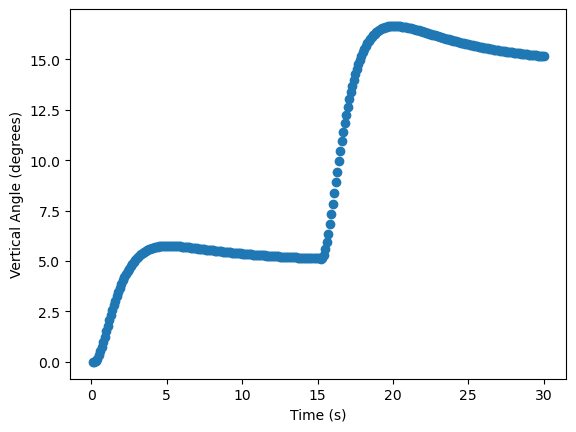

In [868]:
#during thrust
plt.scatter(time[:300], rocket_1.vert_angle[0][:300])
#plt.xlim(14, 16)
plt.xlabel ("Time (s)")
plt.ylabel ("Vertical Angle (degrees)")
print("Lowest Vertical Angle: " + str(min(rocket_1.vert_angle[0][:300])) + " Highest Vert. Angle  " + str(max(rocket_1.vert_angle[0][:300])) + ", Final Vertical Angle: " + str(rocket_1.vert_angle[0][300]))

Lowest Vertical Angle: -147.9611049254926, Final Vertical Angle: -140.261992802118


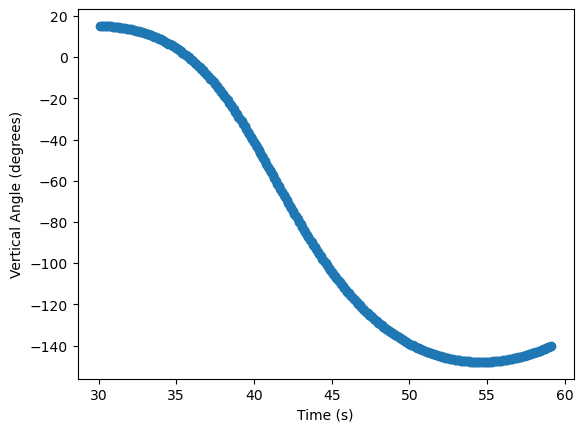

In [869]:
#let's look at free-fall only
#oscillates!!!
plt.plot(time_cont[300:], rocket_1.vert_angle[0][301:])
plt.scatter(time_cont[300:], rocket_1.vert_angle[0][301:])
plt.xlabel ("Time (s)")
plt.ylabel ("Vertical Angle (degrees)")
print("Lowest Vertical Angle: " + str(min(rocket_1.vert_angle[0][301:])) + ", Final Vertical Angle: " + str(rocket_1.vert_angle[0][-1]))

In [870]:
rocket_1.vert_angle[1][300:]

[-0.07152902330742146,
 -0.13337418324991648,
 -0.1960470024934791,
 -0.2595819093858388,
 -0.3240135272071173,
 -0.38937667640318546,
 -0.45570637575580897,
 -0.523037842409169,
 -0.5914064906660256,
 -0.6608479294600577,
 -0.7313979584037402,
 -0.8030925623034855,
 -0.8759679040256617,
 -0.9500603155884847,
 -1.025406287345637,
 -1.1020424551177868,
 -1.180005585117928,
 -1.2593325565056492,
 -1.3400603413940109,
 -1.4222259821207035,
 -1.5058665655825219,
 -1.5910191944189598,
 -1.677720954816876,
 -1.7660088806937477,
 -1.855919914002009,
 -1.9474908608814185,
 -2.0407583433703413,
 -2.1357587463703416,
 -2.2325281595416224,
 -2.3311023137897333,
 -2.4315165119866977,
 -2.533805553552455,
 -2.6380036525054416,
 -2.74414434857445,
 -2.8522604109479053,
 -2.9623837342216253,
 -3.0745452260924164,
 -3.1887746863328417,
 -3.305100676572726,
 -3.423550380405963,
 -3.544149453337587,
 -3.666921862086651,
 -3.791889712765954,
 -3.9190730674711207,
 -4.048489748829904,
 -4.180155132089101,

In [871]:
import numpy as np
from bokeh.models import LinearColorMapper, LogTicker, ColorBar, LogColorMapper
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource


TOOLTIPS = [
    ("time_cont", "@time_cont"),
    ("(x,y)", "(@x, @y)"),
    ("(v_x, v_y)", "(@v_x, @v_y)"),
]


source = ColumnDataSource(dict(x=rocket_1.x[0][1:], y=rocket_1.y[0][1:], time_cont=time_cont, v_x = rocket_1.x[1][1:], v_y = rocket_1.y[1][1:]))
p = figure(width=800, height=300, title="Rocket Ascension Path",
           match_aspect=True, tooltips=TOOLTIPS)

cmap = LinearColorMapper(palette="Blues9", 
                         low=min(time_cont), high=max(time_cont))  

p.scatter('x', 'y', size=9, source=source,
          color={'field': 'time_cont', 'transform': cmap})
color_bar = ColorBar(color_mapper=cmap, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')
p.background_fill_color = "#efefef"
p.xaxis.axis_label = 'X-Position (M)'
p.yaxis.axis_label = 'Y-Position (M)'
print("Max Alt. (m): X: " + str(max(rocket_1.x[0])) + " Y: "+str(max(rocket_1.y[0])))
print("Min Alt. (m): X: " + str(min(rocket_1.x[0])) + " Y: "+str(min(rocket_1.y[0])))
print("Max Vel. (m/s): X: " + str(max(rocket_1.x[1])) + " Y: "+str(max(rocket_1.y[1])))
print("Min Vel. (m/s): X: " + str(min(rocket_1.x[1])) + " Y: "+str(min(rocket_1.y[1])))
#p.xaxis.fixed_location = 0
#p.yaxis.fixed_location = 0

show(p)

Max Alt. (m): X: 1837.041026530656 Y: 2291.393481870983
Min Alt. (m): X: 0 Y: -11.209837356310928
Max Vel. (m/s): X: 59.8570945298788 Y: 103.05508040945652
Min Vel. (m/s): X: 0 Y: -234.46453981220643


Highest TVC Angle: 12.192418697887708, Final TVC Angle: 0.643581479386808


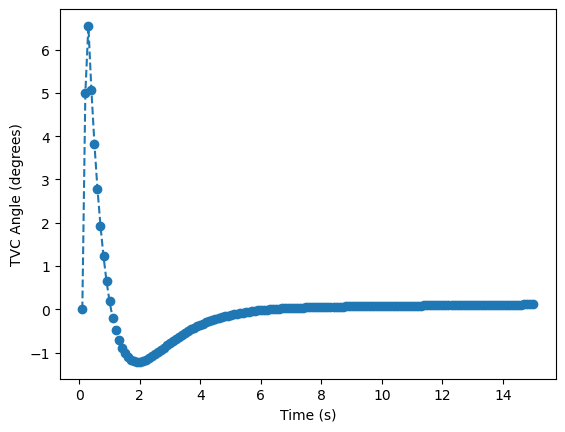

In [872]:
#TVC angle during the first target period
plt.plot(time[:150], rocket_1.tvc_angle[:150], ls='--')
plt.scatter(time[:150], rocket_1.tvc_angle[:150])
#plt.xlim(0,1)
plt.xlabel ("Time (s)")
plt.ylabel ("TVC Angle (degrees)")
print("Highest TVC Angle: " + str(max(rocket_1.tvc_angle)) + ", Final TVC Angle: " + str(rocket_1.tvc_angle[-1]))

Highest TVC Angle: 12.192418697887708, Final TVC Angle: 0.643581479386808


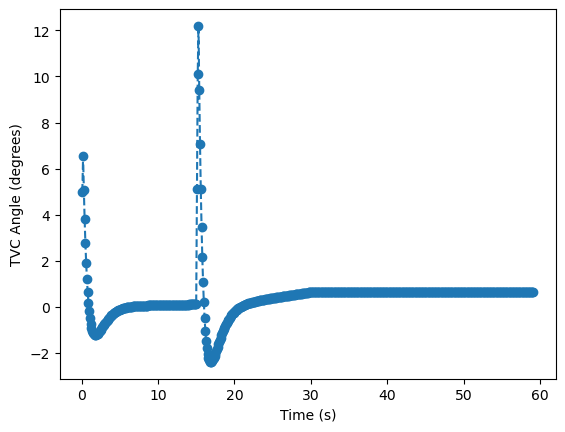

In [873]:
#TVC angle overall
plt.plot(time_cont, rocket_1.tvc_angle[1:], ls='--')
plt.scatter(time_cont, rocket_1.tvc_angle[1:])
#plt.xlim(10,31)
#plt.ylim(-0.35, -0.20)
plt.xlabel ("Time (s)")
plt.ylabel ("TVC Angle (degrees)")
print("Highest TVC Angle: " + str(max(rocket_1.tvc_angle)) + ", Final TVC Angle: " + str(rocket_1.tvc_angle[-1]))

Text(0, 0.5, 'Fd')

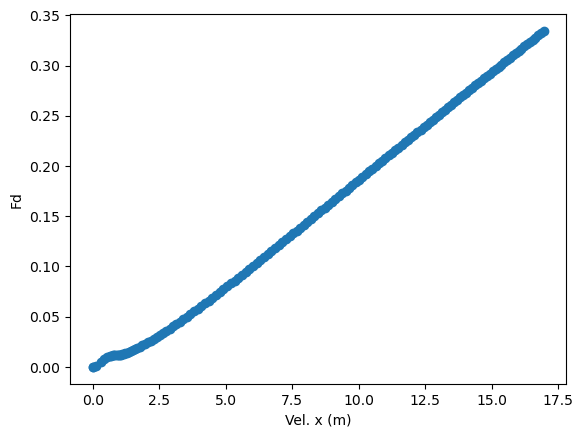

In [874]:
#X_drag curve during first target period
plt.scatter(rocket_1.x[1][:150],  F_drag_x_arr[:150])
#plt.xlim(0,5)
plt.xlabel ("Vel. x (m)")
plt.ylabel ("Fd")

Text(0, 0.5, 'Fd')

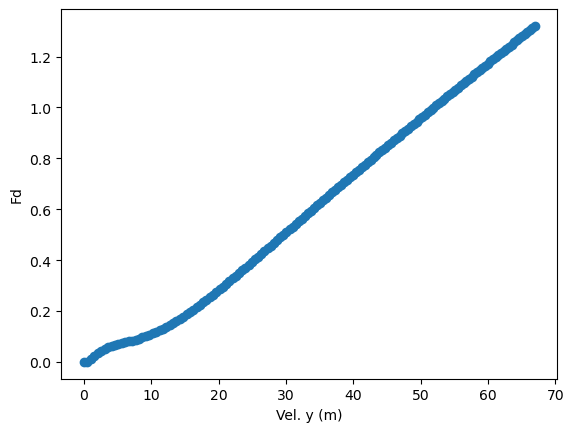

In [875]:
#Y_drag curve during scond target period
plt.scatter(rocket_1.y[1][:150],  F_drag_y_arr[:150])
#plt.xlim(0,5)
plt.xlabel ("Vel. y (m)")
plt.ylabel ("Fd")

Highest Momentum Angle: 89.99999999999999, Final Momentum Angle: -83.20366341633178


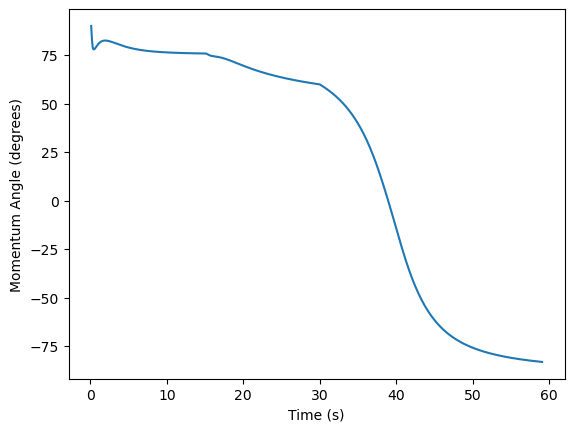

In [876]:
plt.plot(time_cont, rocket_1.momentum_angle[1:])
plt.xlabel ("Time (s)")
plt.ylabel ("Momentum Angle (degrees)")
print("Highest Momentum Angle: " + str(max(rocket_1.momentum_angle)) + ", Final Momentum Angle: " + str(rocket_1.momentum_angle[-1]))

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 237.

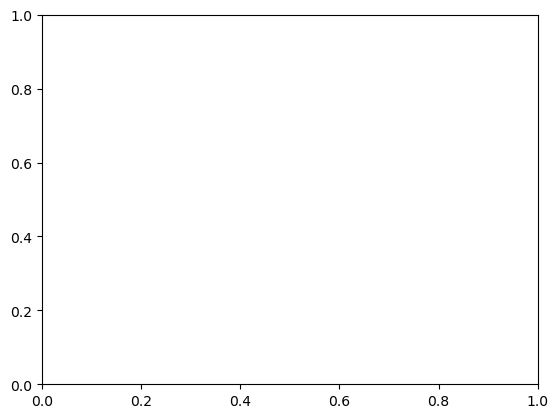

In [143]:
## import matplotlib.pyplot as plt
#DOESNT WORK RN
import numpy as np
scat = plt.scatter(rocket_1.x[0][1:], rocket_1.y[0][1:], c=time, cmap='Blues')
plt.xlabel("X-position (meters)")
plt.ylabel("Y-position (meters)")
print("Max Alt. (m): X: " + str(max(rocket_1.x[0])) + " Y: "+str(max(rocket_1.y[0])))
print("Min Alt. (m): X: " + str(min(rocket_1.x[0])) + " Y: "+str(min(rocket_1.y[0])))
if max(rocket_1.x[0]) > max(rocket_1.y[0]):
    plt.xlim(min(rocket_1.x[0])-(min(rocket_1.x[0])/20), max(rocket_1.x[0])+(max(rocket_1.x[0])/10))
    plt.ylim(0, max(rocket_1.x[0])+(max(rocket_1.x[0])/10))
else:
    plt.xlim(min(rocket_1.x[0])-(min(rocket_1.x[0])/20), max(rocket_1.y[0])+(max(rocket_1.y[0])/10))
    plt.ylim(0, max(rocket_1.y[0])+(max(rocket_1.y[0])/10))


plt.colorbar()
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


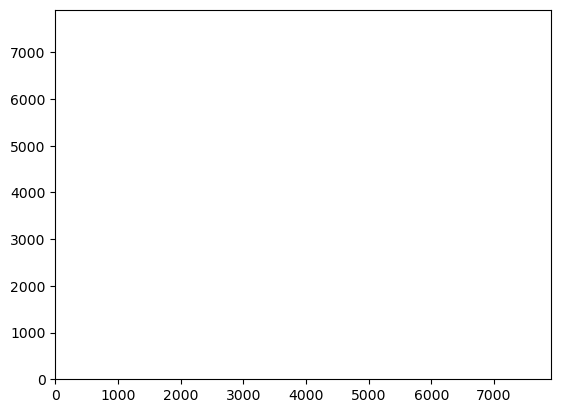

In [339]:
#save as gif
#DONT WORK RN
import matplotlib.animation
fig, ax = plt.subplots()
line, = ax.plot(rocket_1.x[0], rocket_1.y[0])#, c=time, cmap='Blues')
if max(rocket_1.x[0]) > max(rocket_1.y[0]):
    ax.set_xlim(0, max(rocket_1.x[0])+(max(rocket_1.x[0])/10))
    ax.set_ylim(0, max(rocket_1.x[0])+(max(rocket_1.x[0])/10))
else:
    ax.set_xlim(0, max(rocket_1.y[0])+(max(rocket_1.y[0])/10))
    ax.set_ylim(0, max(rocket_1.y[0])+(max(rocket_1.y[0])/10))

def animate(i):
    line.set_data(rocket_1.x[0][:i*20],rocket_1.y[0][:i*20])
    return line,  # the comma is needed here

ani = animation.FuncAnimation(fig, animate, repeat=False, interval=1, frames = len(rocket_1.x[0])//10)
ani.save('basic_animation.gif', fps=10)